In [1]:
# !pip install geopandas

# Import packages

In [199]:

import matplotlib as mpl
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.gridspec as gridspec
import pandas as pd


# Import data

In [79]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

shapefile = gpd.read_file(parent_dir + '/Data Input/DuBoisChallenge - Georgia Counties w 1870 & 1880 data.shp')

# Define target projection (e.g., WGS84)
target_crs = 'EPSG:4326'  # WGS84 projection

# Reproject to the target CRS
shapefile = shapefile.to_crs(target_crs)

In [80]:
ga_tracts = gpd.read_file(parent_dir + '/Data Input/ga_tracts.shp')

# Reproject to the target CRS
ga_tracts = ga_tracts.to_crs(target_crs)

In [81]:
shapefile.head()

,DECADE,NHGISNAM,NHGISST,NHGISCTY,ICPSRST,ICPSRCTY,ICPSRNAM,STATENAM,ICPSRSTI,ICPSRCTYI,ICPSRFIP,GISJOIN,GISJOIN2,data1870 (,data1880_P,geometry
0,1880,Appling,130,0010,44,10,APPLING,Georgia,44,10,13001.0,G1300010,1300010,> 1000,1000 - 2500,"POLYGON ((-82.04858 31.82707, -82.04877 31.826..."
1,1880,Baker,130,0070,44,70,BAKER,Georgia,44,70,13007.0,G1300070,1300070,2500 - 5000,5000 - 10000,"POLYGON ((-84.50808 31.07840, -84.50808 31.078..."
2,1880,Baldwin,130,0090,44,90,BALDWIN,Georgia,44,90,13009.0,G1300090,1300090,5000 - 10000,5000 - 10000,"POLYGON ((-83.05220 33.08068, -83.05235 33.080..."
3,1880,Banks,130,0110,44,110,BANKS,Georgia,44,110,13011.0,G1300110,1300110,> 1000,1000 - 2500,"POLYGON ((-83.45977 34.48114, -83.45918 34.480..."
4,1880,Bartow,130,0150,44,150,BARTOW,Georgia,44,150,13015.0,G1300150,1300150,2500 - 5000,5000 - 10000,"POLYGON ((-84.65923 34.07800, -84.66166 34.078..."


In [83]:
ga_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,13,099,090500,13099090500,905,Census Tract 905,G5020,S,340970567.0,3670838.0,+31.1995791,-084.9937511,"POLYGON ((-85.11460 31.27733, -85.11449 31.277..."
1,13,099,090400,13099090400,904,Census Tract 904,G5020,S,202255980.0,924285.0,+31.3138364,-084.8929190,"POLYGON ((-84.99042 31.27632, -84.99037 31.277..."
2,13,099,090200,13099090200,902,Census Tract 902,G5020,S,297097657.0,2960992.0,+31.4453867,-084.9408107,"POLYGON ((-85.08718 31.37407, -85.08691 31.374..."
3,13,067,031209,13067031209,312.09,Census Tract 312.09,G5020,S,3407093.0,4863.0,+33.8558429,-084.4944273,"POLYGON ((-84.51004 33.85250, -84.50997 33.852..."
4,13,067,031207,13067031207,312.07,Census Tract 312.07,G5020,S,2775451.0,49508.0,+33.8710765,-084.4701703,"POLYGON ((-84.47968 33.86431, -84.47805 33.868..."


In [84]:
shapefile["data1870 ("].value_counts()

data1870 (
2500 - 5000      37
5000 - 10000     33
> 1000           32
1000 - 2500      22
10000 - 15000     5
15000 - 20000     2
20000 - 30000     1
Name: count, dtype: int64

In [194]:
ga_tracts['GEOID2'] = ga_tracts['GEOID'].astype(str).str[:7]

In [195]:
ga_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,alpha_level,alpha_level2,GEOID2
0,13,099,090500,13099090500,905,Census Tract 905,G5020,S,340970567.0,3670838.0,+31.1995791,-084.9937511,"POLYGON ((-85.11460 31.27733, -85.11449 31.277...",0.140088,0.000000,1309909
1,13,099,090400,13099090400,904,Census Tract 904,G5020,S,202255980.0,924285.0,+31.3138364,-084.8929190,"POLYGON ((-84.99042 31.27632, -84.99037 31.277...",0.462175,0.003067,1309909
2,13,099,090200,13099090200,902,Census Tract 902,G5020,S,297097657.0,2960992.0,+31.4453867,-084.9408107,"POLYGON ((-85.08718 31.37407, -85.08691 31.374...",0.438356,0.006135,1309909
3,13,067,031209,13067031209,312.09,Census Tract 312.09,G5020,S,3407093.0,4863.0,+33.8558429,-084.4944273,"POLYGON ((-84.51004 33.85250, -84.50997 33.852...",0.494795,0.000000,1306703
4,13,067,031207,13067031207,312.07,Census Tract 312.07,G5020,S,2775451.0,49508.0,+33.8710765,-084.4701703,"POLYGON ((-84.47968 33.86431, -84.47805 33.868...",0.225671,0.003067,1306703


# Clean Data

In [85]:
#Relable NAs with 'None'
shapefile["data1870 ("] = shapefile["data1870 ("].fillna('None')
shapefile["data1880_P"] = shapefile["data1880_P"].fillna('None')

#Change labels to match labels in the image
changes = {
    '20000 - 30000': 'BETWEEN 20,000 AND 30,000',
    '15000 - 20000': '15,000 TO 20,000',
    '10000 - 15000': '10,000 TO 15,000',
    '5000 - 10000': '5,000 TO 10,000',
    '2500 - 5000': '2,500 TO 5,000',
    '1000 - 2500': '1,000 TO 2,500',
    '> 1000': 'UNDER 1,000'
}

shapefile["data1870 ("] = shapefile["data1870 ("].replace(changes)
shapefile["data1880_P"] = shapefile["data1880_P"].replace(changes)

# Plot data

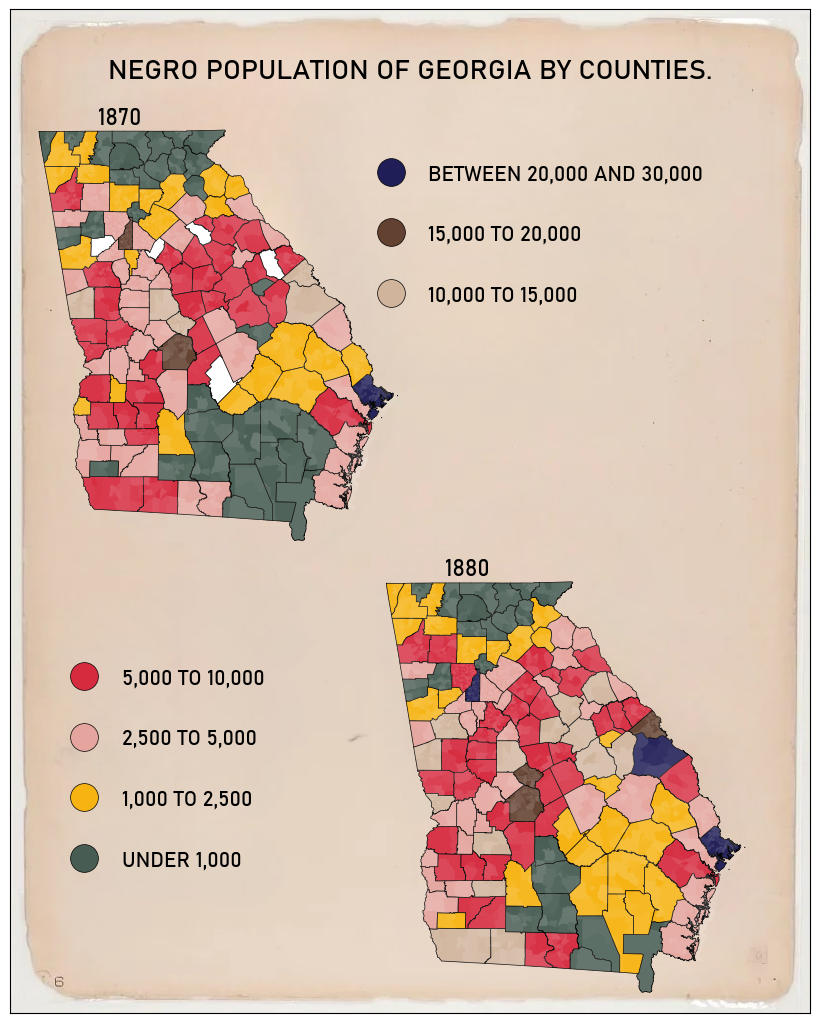

In [216]:
background = plt.imread(parent_dir + '/Data Input/background_photo.jpg')

width = 8
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(width, width * background.shape[0] / background.shape[1]))


background_ax = plt.axes([0, 0, 1, 1]) # create a dummy subplot for the background
background_ax.set_zorder(-1) # set the background subplot behind the others
background_ax.imshow(background, aspect='auto') # show the backgroud image


duboisPalette = {'BETWEEN 20,000 AND 30,000': '#201E56',
                 '15,000 TO 20,000': '#634130',
                 '10,000 TO 15,000': '#D0B49C',
                 '5,000 TO 10,000': '#D62B3F',
                 '2,500 TO 5,000': '#E5A59E',
                 '1,000 TO 2,500': '#F6B311',
                 'UNDER 1,000': '#475C52',
                 'None': '#FFFFFF'
                 }

# Assign a color column based on the categories for each dataset
shapefile['color1870'] = shapefile['data1870 ('].map(duboisPalette)
shapefile['color1880'] = shapefile['data1880_P'].map(duboisPalette)

# Set seed for reproducibility
np.random.seed(20240223)

# Randomly assign numbers for transparency level
ga_tracts['alpha_level'] = np.random.uniform(low=0.01, high=0.2, size=len(ga_tracts))

# Then plot using these color columns
shapefile.plot(ax=ax1, color=shapefile['color1870'], legend=True, edgecolor = 'black', linewidth=0.5)
shapefile.plot(ax=ax4, color=shapefile['color1880'], legend=True, edgecolor = 'black', linewidth=0.5)

ga_tracts.plot(ax=ax1, alpha=ga_tracts['alpha_level'], edgecolor=None, facecolor='white')
ga_tracts.plot(ax=ax4, alpha=ga_tracts['alpha_level'], edgecolor=None, facecolor='white')

#Adjust handles & title font
bahnschrift_font_legend = FontProperties(family='Bahnschrift', size=15, weight='light')  
bahnschrift_font_title = FontProperties(family='Bahnschrift', size=20, weight='bold')  

#fig.suptitle('NEGRO POPULATION OF GEORGIA BY COUNTIES.', **font, fontsize=16, fontweight='bold', y=0.95)
fig.suptitle('NEGRO POPULATION OF GEORGIA BY COUNTIES.', fontsize=20, fontweight='bold', y=0.95, fontproperties=bahnschrift_font_title,)
# fig.suptitle('NEGRO POPULATION OF GEORGIA BY COUNTIES.', fontproperties=bahnschrift_font_title, y=0.95)

ax1.set_title('1870', fontsize=16, fontweight='bold', x=.25, y=.95, fontname='Bahnschrift')
ax4.set_title('1880', fontsize=16, fontweight='bold', x=.25, y=.95, fontname='Bahnschrift')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

#Create custom legend
handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=20, label=label, markeredgecolor='black', markeredgewidth=0.5) for label, color in duboisPalette.items()]
legend_top_right = handles[0:3]
legend_bottom_left = handles[3:7]
ax2.legend(handles=legend_top_right, loc=(0, 0.55), frameon=False, labelspacing=2, prop = bahnschrift_font_legend)

legend_bottom_left = handles[3:7]
ax3.legend(handles=legend_bottom_left, loc=(0.1, 0.3), frameon=False, labelspacing=2, prop = bahnschrift_font_legend)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.subplots_adjust(left=0.005, right=0.95, top=0.9, bottom=0.0, wspace=-0.15, hspace=0.00)

plt.show()